# Huffman Coding
The Huffman coding is a lossless data compression algorithm. The idea is to assign variable-length codes to input characters. The lengths of the assigned codes are based on the frequencies of corresponding characters. The most frequent character gets the smallest code and the least frequent character gets the largest code. 

This jupyter notebook provides a simple implementation of the Huffman coding algorithm and visualizes the Huffman tree.

In [62]:
import heapq
import matplotlib.pyplot as plt
import networkx as nx

class HuffmanNode:
    def __init__(self, char, freq):
        self.char = char
        self.freq = freq
        self.left = None
        self.right = None
    
    def __lt__(self, other):
        return self.freq < other.freq
    

## Step by Step Visualization of Huffman Coding

### Step 1: Calculate the frequency of each character in the input text

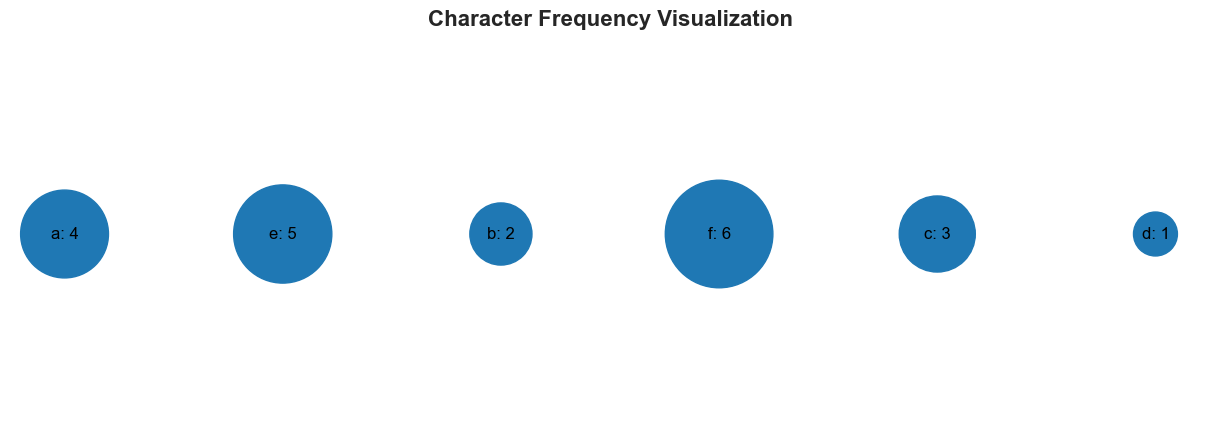

In [63]:
def calculate_frequency(text):
    frequency = {}
    for c in text:
        frequency[c] = frequency.get(c, 0) + 1
    return frequency

def visualize_frequency(frequency):
    graph = nx.Graph()
    for c, freq in frequency.items():
        graph.add_node(c, label=f"{c}: {freq}")
        
    pos = {c: (i, 0) for i, c in enumerate(frequency)}
    node_size = [freq * 1000 for freq in frequency.values()]  # Size of nodes based on frequency
    plt.figure(figsize=(12, 4))
    nx.draw(graph, pos, with_labels=False, node_size=node_size)
    labels = nx.get_node_attributes(graph, 'label')
    nx.draw_networkx_labels(graph, pos, labels, font_size=12)
    plt.title("Character Frequency Visualization", fontsize=16, fontweight='bold')
    plt.show()

example_text = "aeebafabacecffcdefeff"
frequency = calculate_frequency(example_text)
visualize_frequency(frequency)

### Step 2: Build the Huffman Tree
Look for the two nodes with the smallest frequencies and merge them into a new node. Repeat this process until there is only one node left in the heap.

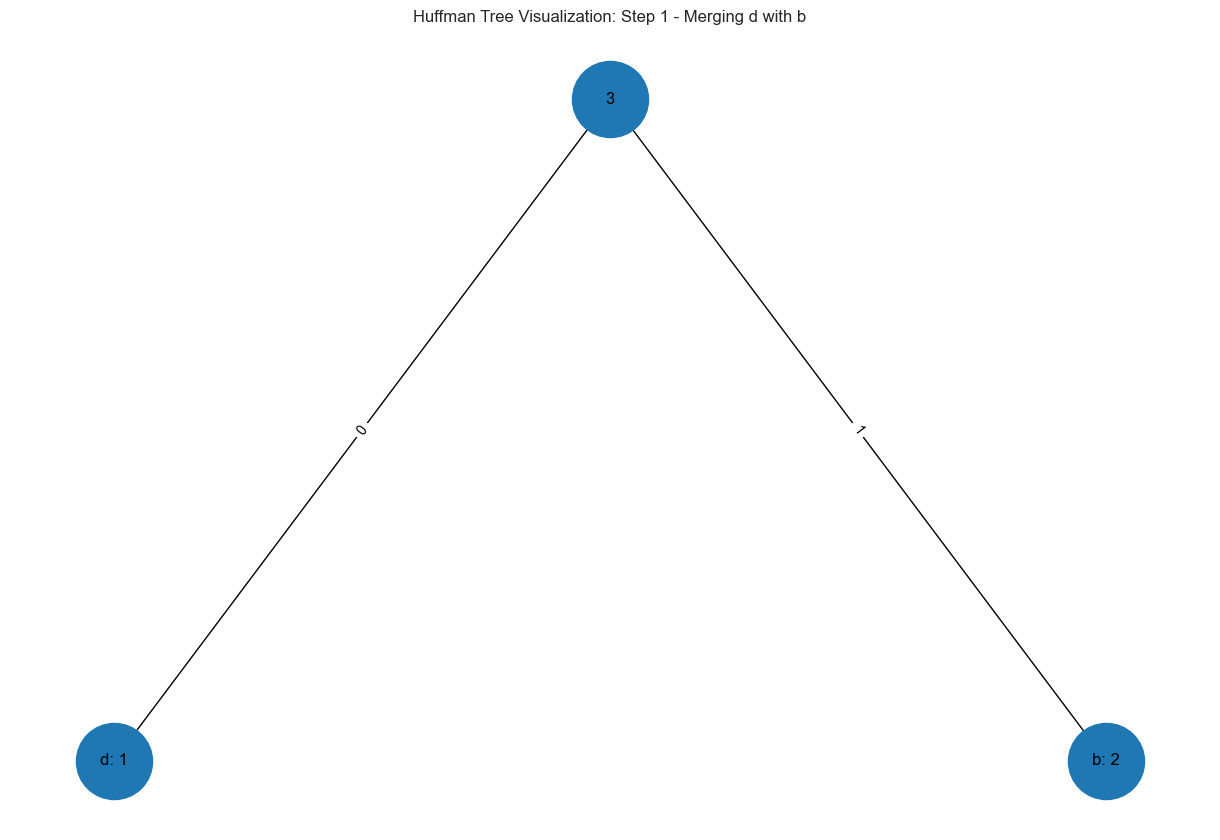

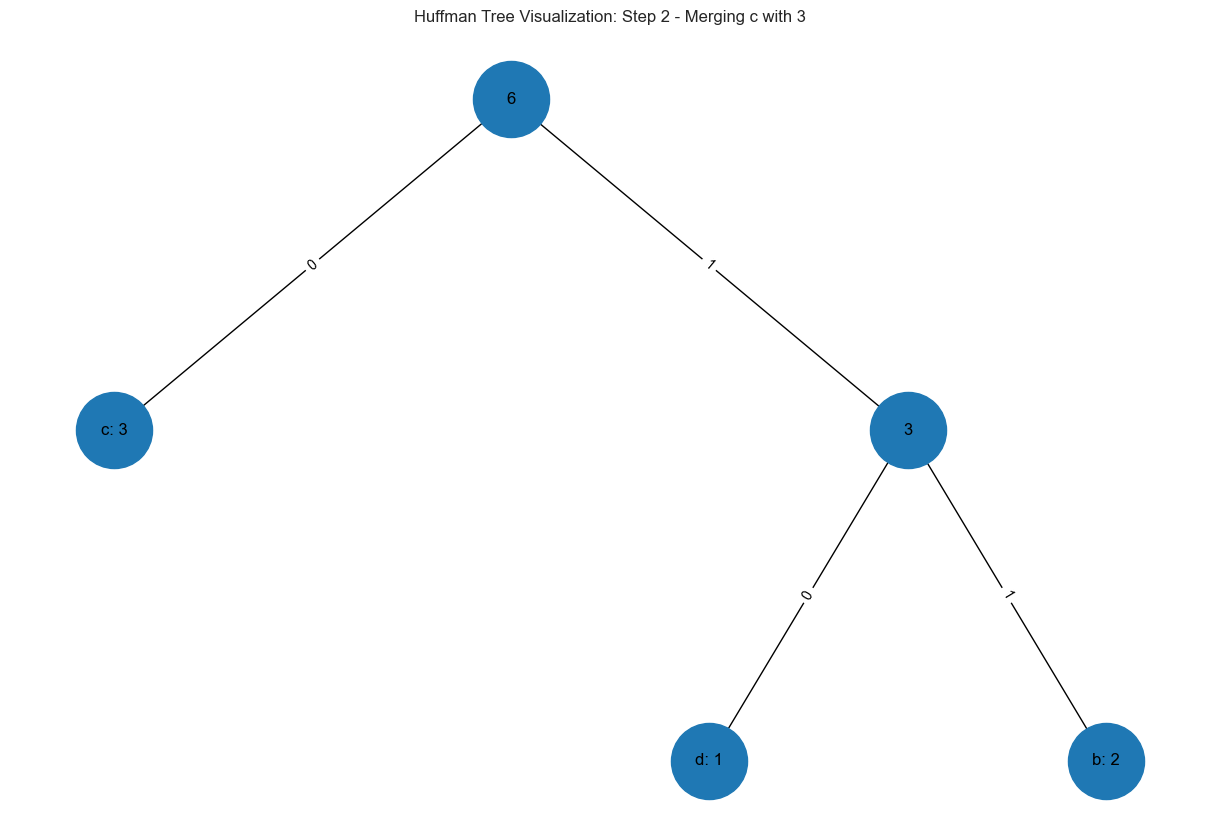

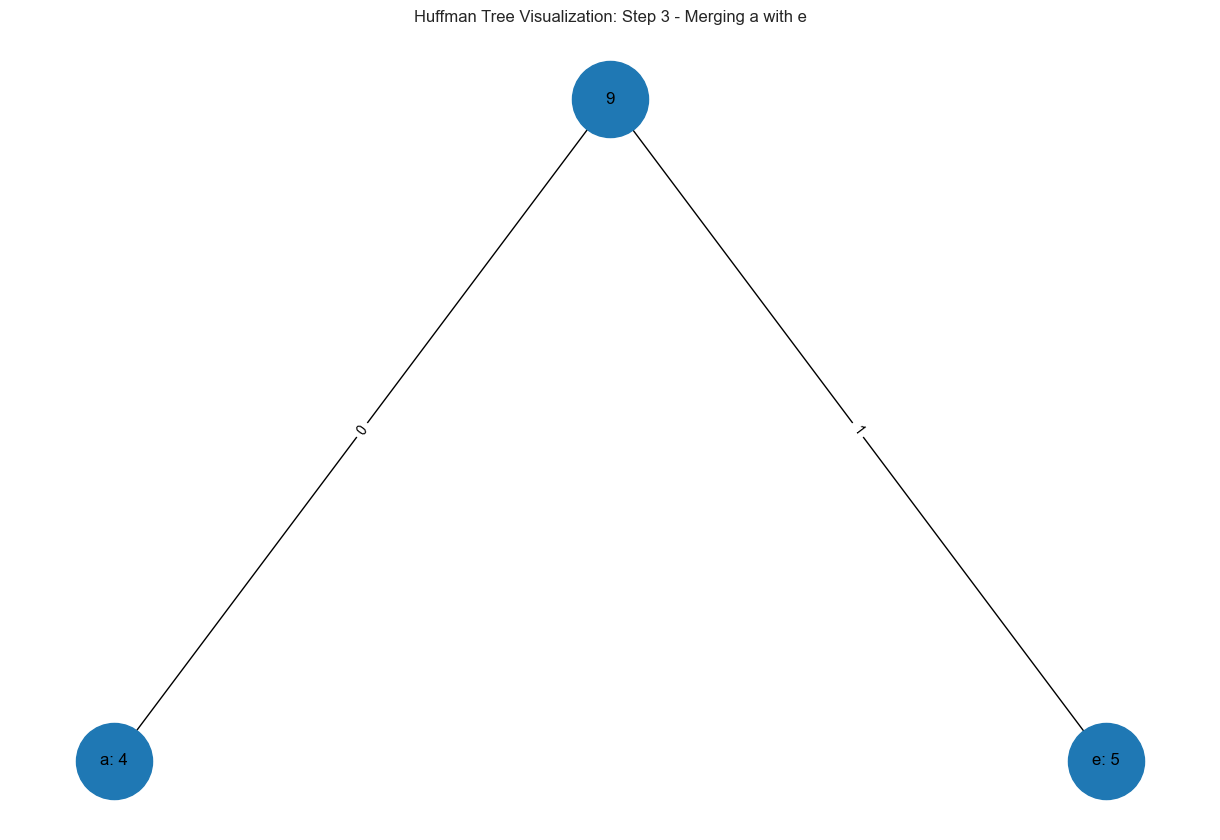

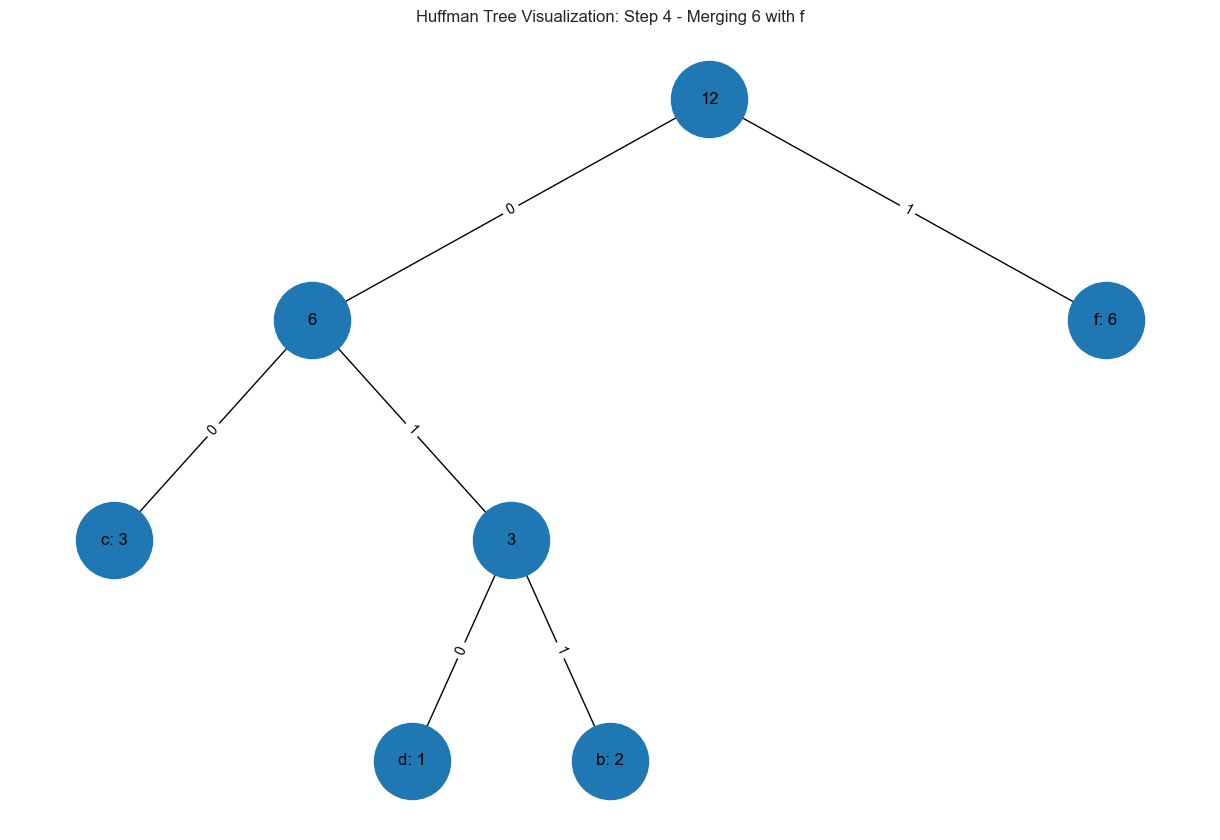

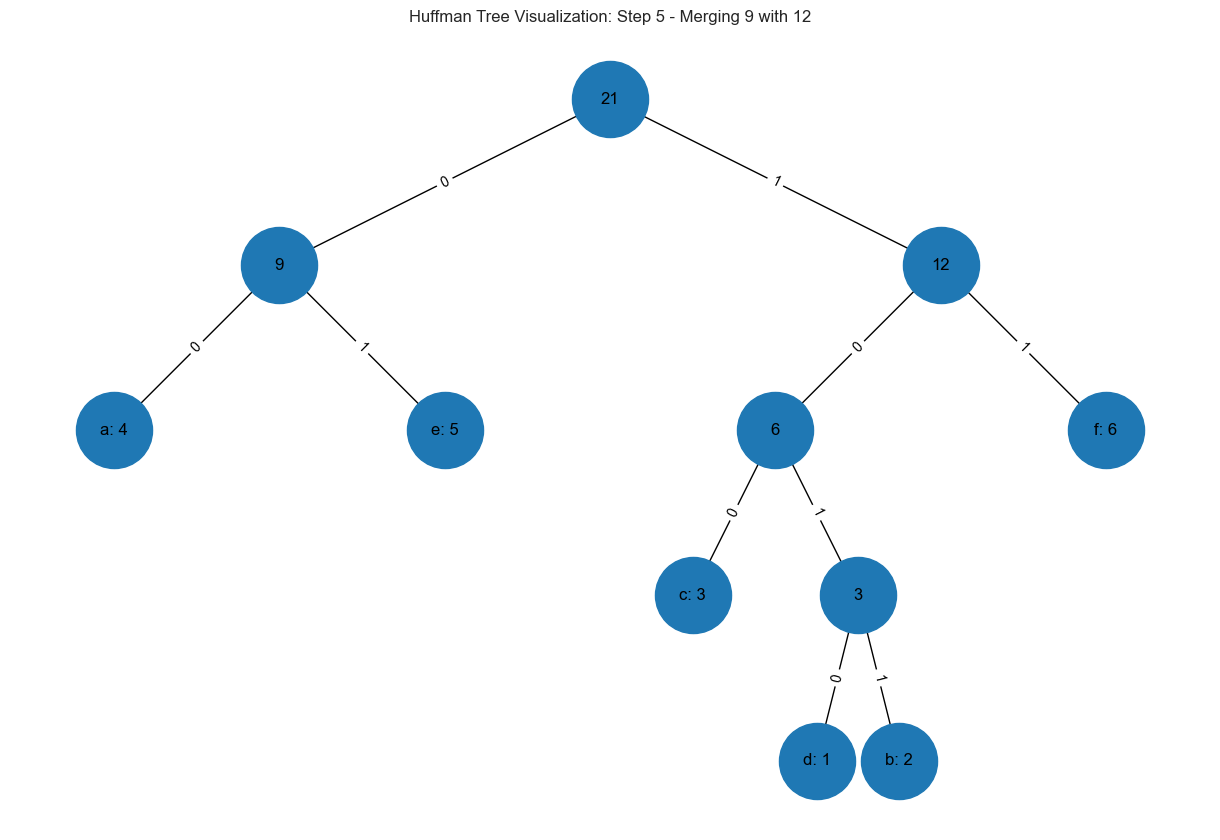

In [64]:
def visualize_huffman_tree(root, title):
    graph = nx.Graph()
    
    def add_nodes(node, x, y, level=0):
        if node is None:
            return
        
        node_id = id(node)
        label = f"{node.char}: {node.freq}" if node.char else f"{node.freq}"
        graph.add_node(node_id, pos=(x, y), label=label)
        
        if node.left:
            left_id = id(node.left)
            graph.add_edge(node_id, left_id)
            add_nodes(node.left, x - 1 / (2 ** level), y - 1, level + 1)
        
        if node.right:
            right_id = id(node.right)
            graph.add_edge(node_id, right_id)
            add_nodes(node.right, x + 1 / (2 ** level), y - 1, level + 1)
    
    add_nodes(root, 0, 0)
    
    pos = nx.get_node_attributes(graph, 'pos')
    labels = nx.get_node_attributes(graph, 'label')
    
    plt.figure(figsize=(12, 8))
    nx.draw(graph, pos, with_labels=False, node_size=3000)
    nx.draw_networkx_labels(graph, pos, labels, font_size=12)
    
    # modify edge labels
    edge_labels = {}
    for u, v in graph.edges():
        if graph.nodes[v]['pos'][0] < graph.nodes[u]['pos'][0]:  # left child
            edge_labels[(u, v)] = '0'
        else:  # right child
            edge_labels[(u, v)] = '1'
    
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels)
    plt.title(title)
    plt.axis('off')
    plt.show()


def build_huffman_tree(freq) -> HuffmanNode:
    heap = [HuffmanNode(c, freq) for c, freq in freq.items()]
    heapq.heapify(heap)
    
    step = 1
    while len(heap) > 1:
        left = heapq.heappop(heap)
        right = heapq.heappop(heap)
        merged = HuffmanNode(None, left.freq + right.freq)
        merged.left = left
        merged.right = right
        heapq.heappush(heap, merged)
        
        title = f"Huffman Tree Visualization: Step {step} - Merging {left.char or left.freq} with {right.char or right.freq}"
        visualize_huffman_tree(merged, title)
        
        step += 1
        
    return heap[0]

root = build_huffman_tree(frequency)
    

### Step 3: Generate Huffman Codes
Traverse the Huffman tree to generate the Huffman codes for each character.

In [65]:
def generate_codes(root, current_code="", codes=None):
    if codes is None:
        codes = {}
    if root is None:
        return
    
    if root.char is not None:
        codes[root.char] = current_code
        return
    
    generate_codes(root.left, current_code + "0", codes)
    generate_codes(root.right, current_code + "1", codes)
    
    return codes

codes = generate_codes(root)
print("Huffman Codes:")
for char, code in codes.items():
    print(f"{char}: {code}")

Huffman Codes:
a: 00
e: 01
c: 100
d: 1010
b: 1011
f: 11


### Step 4: Encode the Input Text
Encode the input text using the generated Huffman codes.

In [66]:
def encode_text(text, codes):
    encoded_text = "".join(codes[c] for c in text)
    return encoded_text

encoded_text = encode_text(example_text, codes)
print(f"Original Text: {example_text}")
print(f"Encoded Text: {encoded_text}")

Original Text: aeebafabacecffcdefeff
Encoded Text: 000101101100110010110010001100111110010100111011111


### Step 5: Decode the Encoded Text
Decode the encoded text using the Huffman tree.

In [67]:
def decode_text(encoded_text, root):
    decoded_text = ""
    current = root
    for bit in encoded_text:
        if bit == "0":
            current = current.left
        else:
            current = current.right
        
        if current.char is not None:
            decoded_text += current.char
            current = root
    
    return decoded_text

decoded_text = decode_text(encoded_text, root)
print(f"Decoded Text: {decoded_text}")
print(f"Is the original text equal to the decoded text? {example_text == decoded_text}")

Decoded Text: aeebafabacecffcdefeff
Is the original text equal to the decoded text? True


## Comparison size of the original text and the encoded text


In [68]:
size_original = len(example_text) * 8
size_encoded = len(encoded_text)

print(f"Size of the original text: {size_original} bits")
print(f"Size of the encoded text: {size_encoded} bits")

Size of the original text: 168 bits
Size of the encoded text: 51 bits
